# Analysis of Supply and Delivery data from September 2024

Data

In [2]:
include("src/utils.jl")
include("src/read_data.jl")
include("src/plot_data.jl")


plot_sales (generic function with 1 method)

## Analyze Demand


In [3]:
df_supply = read_supply()

Row,ITEM,CATEGORY,ORDER_DATE,ORDERED_QUANTITY,DELIVERY_DATE,DELIVERED_QUANTITY
,String31,String1?,DateTime,Int64,DateTime,Int64?
1,MCD-DOXOU-01-WH-0M,D,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1
2,MCD-DOXOU-01-WH-XL,D,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1
3,MCD-GBLL2-BK-0M,C,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1
4,MCD-RDN19-ST-0M,C,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1
5,MCD-BAGPK-YW,C,2022-01-01T01:16:00,2,2022-01-01T09:26:00,2
6,MCD-COL19-BE-0L,D,2022-01-01T01:16:00,1,2022-01-01T09:26:00,1
7,MCD-COL19-BE-0M,D,2022-01-01T01:16:00,1,2022-01-01T09:26:00,1
8,MCD-COL19-BK-0L,D,2022-01-01T01:16:00,2,2022-01-01T09:26:00,2
9,MCD-COL19-BK-0M,D,2022-01-01T01:16:00,2,2022-01-01T09:26:00,2


In [4]:
# Compute supply Ratio
add_supply_ratio!(df_supply)
@show mean(df_supply.SUPPLY_RATIO)
df_supply

mean(df_supply.SUPPLY_RATIO) = 0.5807140961928734


Row,ITEM,CATEGORY,ORDER_DATE,ORDERED_QUANTITY,DELIVERY_DATE,DELIVERED_QUANTITY,SUPPLY_RATIO
,String31,String1?,DateTime,Int64,DateTime,Int64?,Int64
1,MCD-DOXOU-01-WH-0M,D,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1,1
2,MCD-DOXOU-01-WH-XL,D,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1,1
3,MCD-GBLL2-BK-0M,C,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1,1
4,MCD-RDN19-ST-0M,C,2022-01-01T00:40:00,1,2022-01-01T09:25:00,1,1
5,MCD-BAGPK-YW,C,2022-01-01T01:16:00,2,2022-01-01T09:26:00,2,1
6,MCD-COL19-BE-0L,D,2022-01-01T01:16:00,1,2022-01-01T09:26:00,1,1
7,MCD-COL19-BE-0M,D,2022-01-01T01:16:00,1,2022-01-01T09:26:00,1,1
8,MCD-COL19-BK-0L,D,2022-01-01T01:16:00,2,2022-01-01T09:26:00,2,1
9,MCD-COL19-BK-0M,D,2022-01-01T01:16:00,2,2022-01-01T09:26:00,2,1


In [5]:
# Group by year, month 
transform!(df_supply, :ORDER_DATE => ByRow(d->join(yearmonth(d),"-")) => :YEAR_MONTH)
df_supply_ratio = combine(groupby(df_supply, :YEAR_MONTH), :SUPPLY_RATIO => mean => :SUPPLY_RATIO, nrow => :NB_ORDERS)

Row,YEAR_MONTH,SUPPLY_RATIO,NB_ORDERS
,String,Float64,Int64
1,2022-1,0.541044,7029
2,2022-2,0.526301,7129
3,2022-3,0.484251,8826
4,2022-4,0.526726,9373
5,2022-5,0.532779,7215
6,2022-6,0.517269,12392
7,2022-7,0.447891,9221
8,2022-8,0.453862,12235
9,2022-9,0.387405,11195


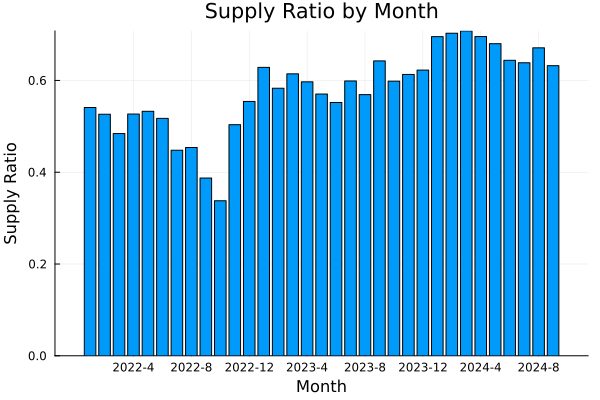

In [6]:
# plot supply ratio by month
bar(df_supply_ratio.YEAR_MONTH, df_supply_ratio.SUPPLY_RATIO, title="Supply Ratio by Month", xlabel="Month", ylabel="Supply Ratio", legend=false)

In [7]:
# supply ratio by product
df_supply_ratio_product = combine(groupby(df_supply, [:ITEM, :CATEGORY]), :SUPPLY_RATIO => mean => :SUPPLY_RATIO, nrow => :NB_ORDERS,
                                                      :ORDER_DATE => minimum => :FIRST_ORDER_DATE, :ORDER_DATE => maximum => :LAST_ORDER_DATE)
# sort by decreasing supply ratio and number of order
sort!(df_supply_ratio_product, [:SUPPLY_RATIO, :NB_ORDERS], rev=[true, true])

Row,ITEM,CATEGORY,SUPPLY_RATIO,NB_ORDERS,FIRST_ORDER_DATE,LAST_ORDER_DATE
,String31,String1?,Float64,Int64,DateTime,DateTime
1,MCD-GEN24-LS-XL,missing,1.0,208,2024-08-09T17:06:00,2024-08-29T14:22:00
2,MCD-GEN22-CY-0S,C,1.0,203,2022-08-02T14:11:00,2022-09-02T16:03:00
3,MCD-COL60-WH-0L,C,1.0,174,2022-04-09T07:25:00,2024-01-02T12:10:00
4,MCD-COL60-WH-0M,C,1.0,161,2022-04-09T11:15:00,2023-10-19T11:05:00
5,MCD-SLIBG-NB,C,1.0,119,2022-01-13T09:01:00,2022-09-02T16:03:00
6,MCD-RCHRD-BE-0L,C,1.0,115,2022-02-23T17:17:00,2024-06-24T14:41:00
7,MCD-COL60-WH-XL,C,1.0,115,2022-04-09T11:15:00,2023-09-30T20:55:00
8,MCD-COL60-WH-2L,C,1.0,106,2022-04-09T13:30:00,2023-07-11T14:21:00
9,MCD-RCMRD-RE-XL,B,1.0,104,2022-01-03T09:17:00,2023-08-10T09:37:00


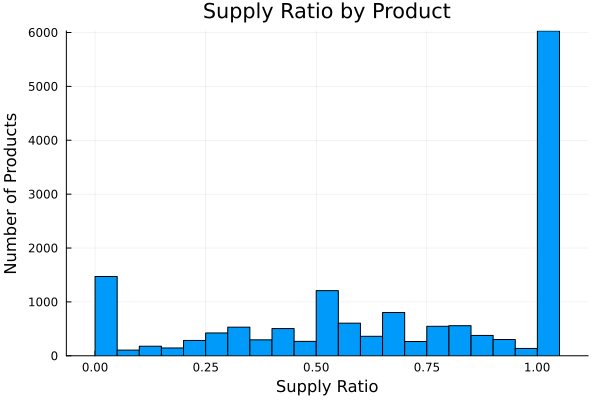

In [35]:
# histogram of supply ratio by product
histogram(df_supply_ratio_product.SUPPLY_RATIO, title="Supply Ratio by Product", xlabel="Supply Ratio", ylabel="Number of Products", legend=false)

maximum(df_supply_ratio_product_1.NB_ORDERS) = 208


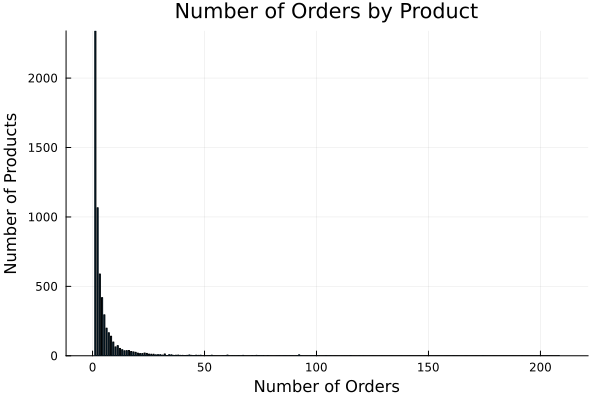

In [25]:
# select products with supply ratio  = 1
df_supply_ratio_product_1 = subset(df_supply_ratio_product, :SUPPLY_RATIO => ByRow(==(1)))
@show maximum(df_supply_ratio_product_1.NB_ORDERS)
# histogram of number of orders by product
histogram(df_supply_ratio_product_1.NB_ORDERS, title="Number of Orders by Product", xlabel="Number of Orders", ylabel="Number of Products", legend=false)

In [26]:
df_delivery = read_delivery()

Row,PURCHASE_ORDER,ITEM_CODE,ORDER_DATE,ORDERED_QUANTITY,DELIVERY_DATE,DELIVERED_QUANTITY
,String15,String31,Date,Int64?,Date?,Int64?
1,P30013660,5PV-F8371-00,2021-10-26,600,2021-12-07,600
2,P30013751,90520-02818,2021-11-15,30,2021-12-10,30
3,P30013762,1S8-F139R-00,2021-11-19,200,2022-01-04,200
4,P30013762,1S8-F1717-00,2021-11-19,200,2022-01-04,200
5,P30013762,1S8-F1746-00,2021-11-19,200,2022-01-04,200
6,P30013762,5PV-F8371-00,2021-11-19,100,2022-01-04,100
7,P30013662,3XL-H5540-M0,2021-10-26,400,2022-02-25,400
8,P30012507,5XK-H3560-00,2021-01-14,600,2022-02-10,600
9,P30012806,5XK-H3560-00,2021-03-11,400,2022-03-11,400


## Analyze purchase orders


In [27]:
# compute lead time
transform!(df_delivery, [:ORDER_DATE, :DELIVERY_DATE] => ByRow((o, d) -> ismissing(d) ? missing : Float64(Dates.value(d-o))) => :LEAD_TIME)
# lead time by product, average and standard deviation
df_lead_time = combine(groupby(df_delivery, :ITEM_CODE), :LEAD_TIME => mean ∘ skipmissing => :LEAD_TIME, :LEAD_TIME => std  ∘ skipmissing => :LEAD_TIME_STD, nrow => :NB_ORDERS)

Row,ITEM_CODE,LEAD_TIME,LEAD_TIME_STD,NB_ORDERS
,String31,Float64,Float64,Int64
1,5PV-F8371-00,58.1333,20.0637,15
2,90520-02818,36.0,13.4536,3
3,1S8-F139R-00,46.0,NaN,1
4,1S8-F1717-00,46.0,0.0,2
5,1S8-F1746-00,46.0,NaN,1
6,3XL-H5540-M0,48.5455,37.8612,11
7,5XK-H3560-00,203.13,99.1506,23
8,55C-F6335-10,135.727,65.6906,22
9,5BU-F6260-00,224.333,147.243,12


median(df_lead_time.LEAD_TIME) = 66.36931818181819
mean(df_lead_time.LEAD_TIME) = 82.8372264754758


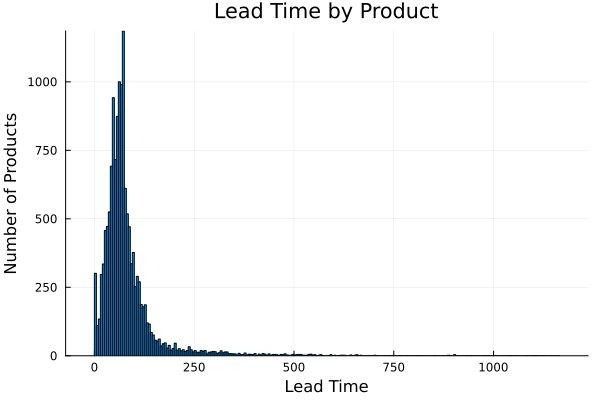

In [32]:
subset!(df_lead_time, :LEAD_TIME => ByRow(!isnan))
@show median(df_lead_time.LEAD_TIME)
@show mean(df_lead_time.LEAD_TIME)
histogram(df_lead_time.LEAD_TIME, title="Lead Time by Product", xlabel="Lead Time", ylabel="Number of Products", legend=false)